## 1. 前置学习

### 1.1 Scipy 求解一阶常微分方程

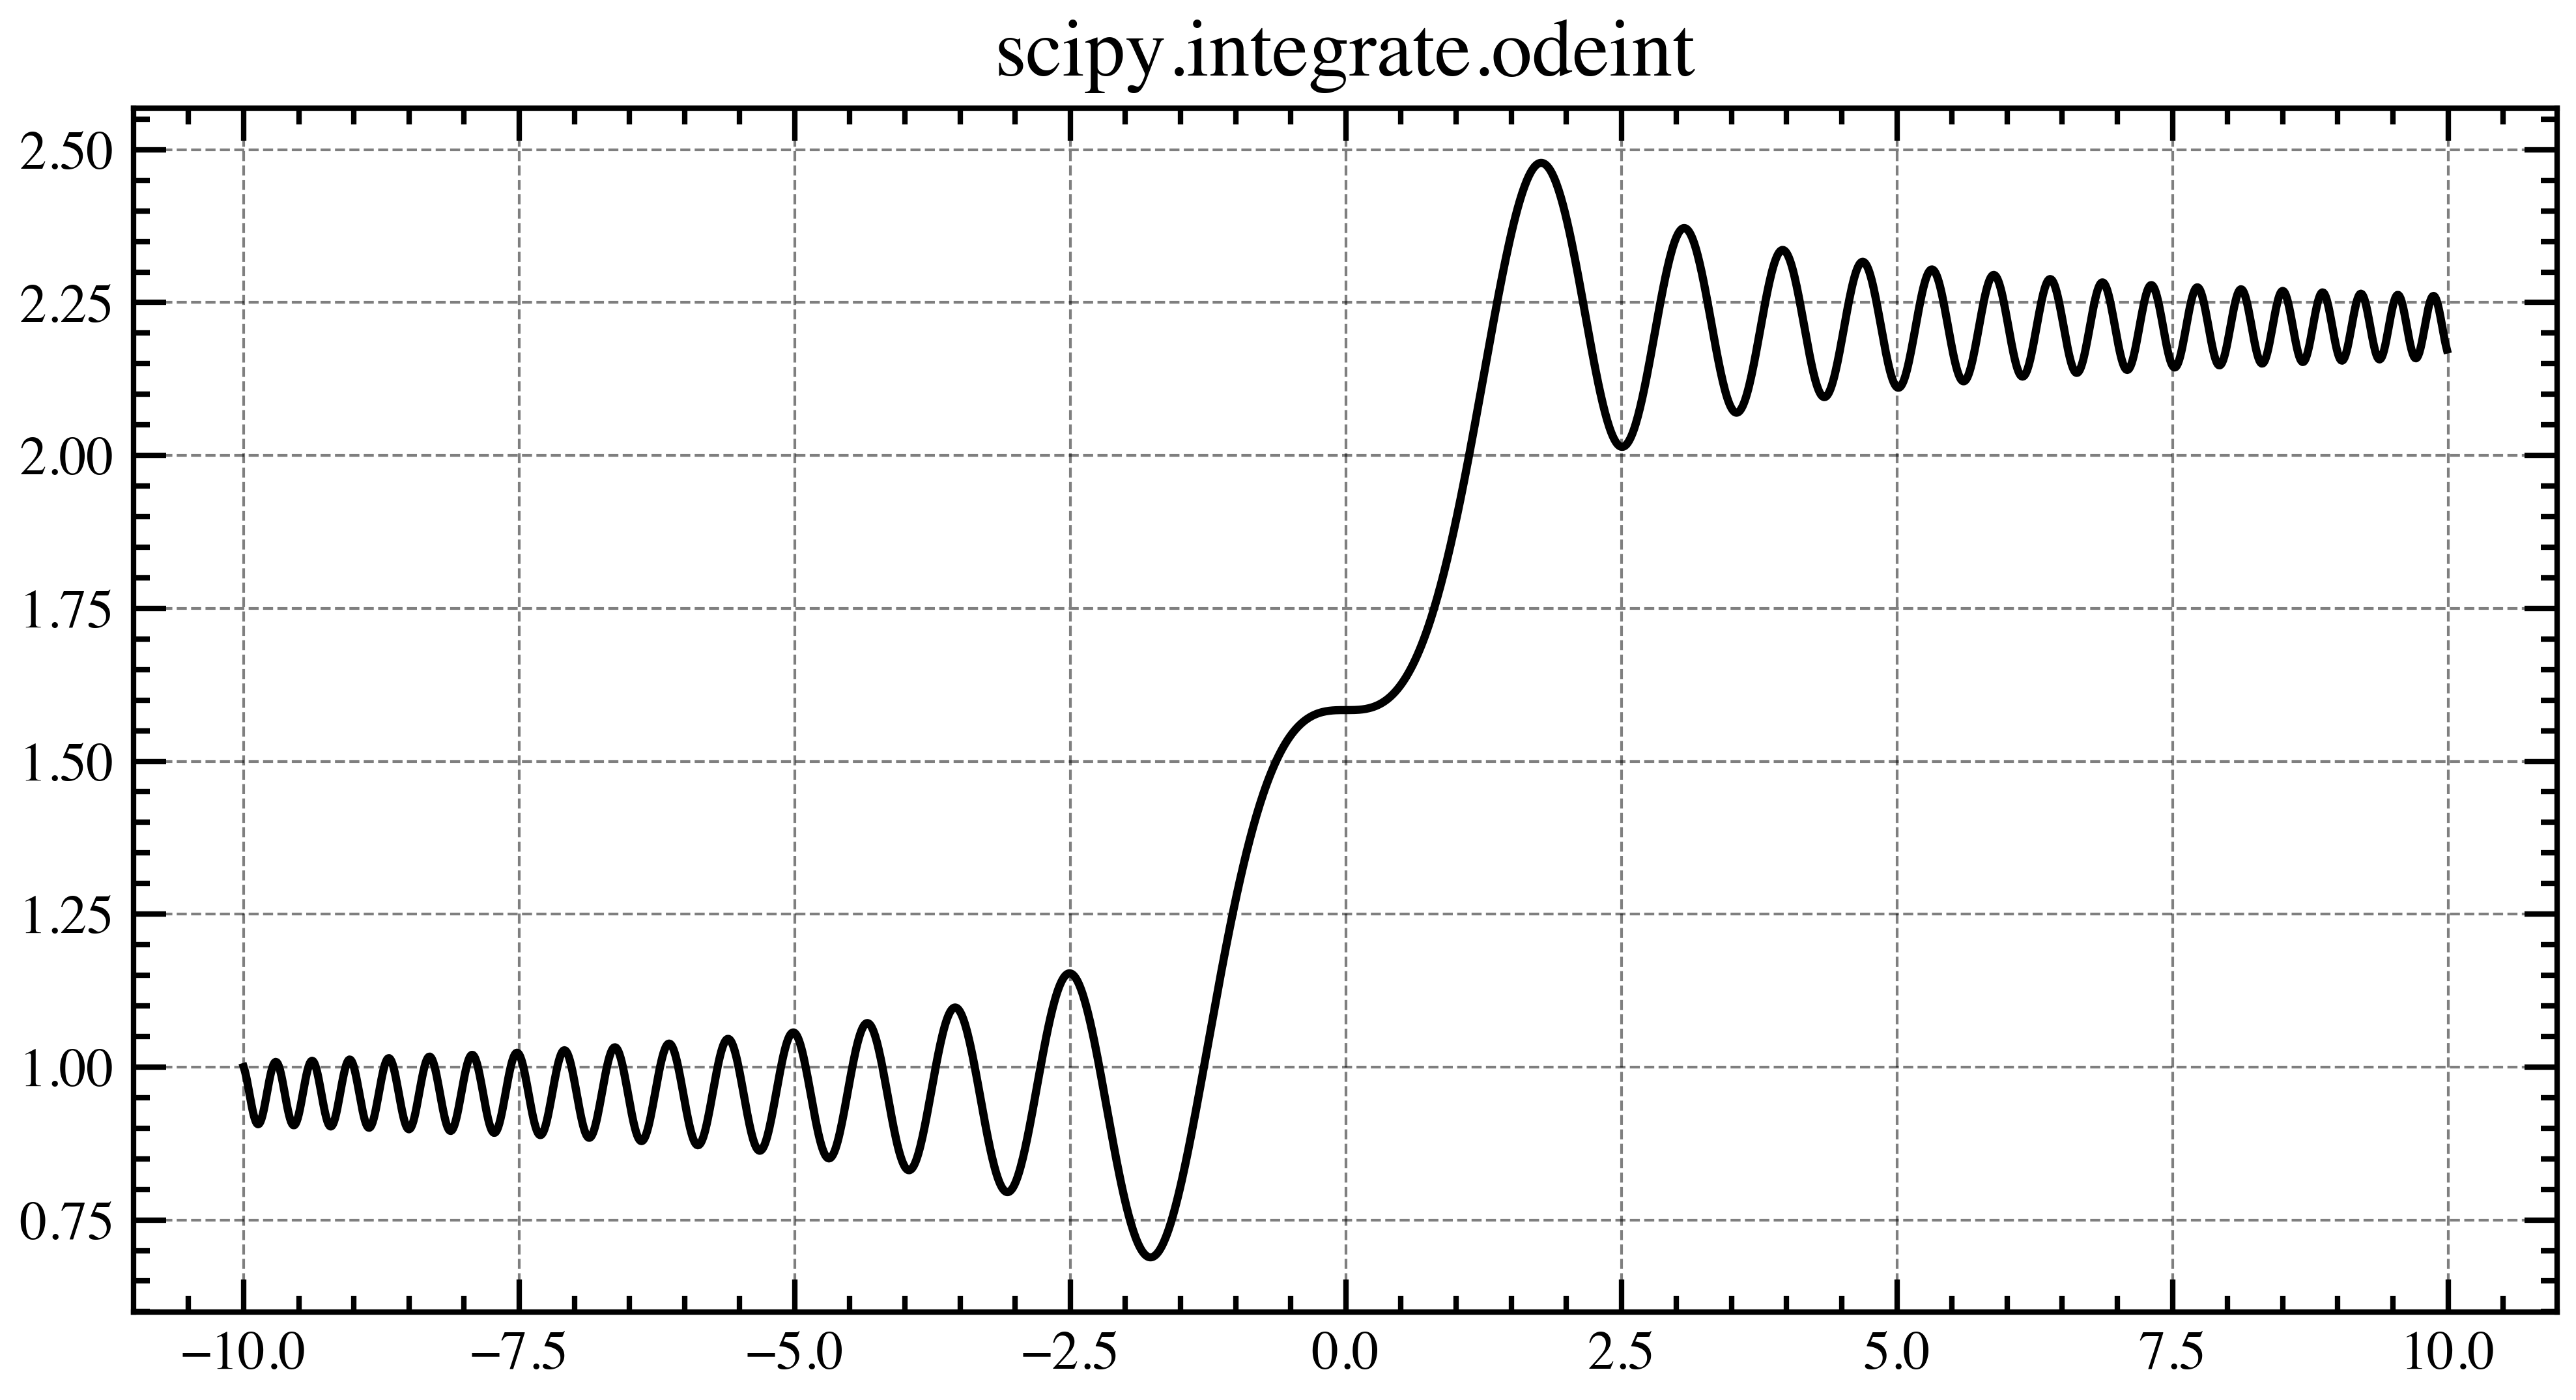

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from scipy.integrate import odeint
plt.style.use(['science', 'notebook', 'grid', 'ieee'])

def dy_dt(y, t):
    return np.sin(t**2)

y0 = 1
t = np.arange(-10, 10, 0.01)
y = odeint(dy_dt, y0, t)

plt.figure(figsize=(8, 4))
plt.plot(t, y, lw=1.5)
plt.tick_params(axis='both', labelsize=10)
plt.title("scipy.integrate.odeint", fontsize=15)
plt.show()

### 1.2 Scipy 求解一阶常微分方程组

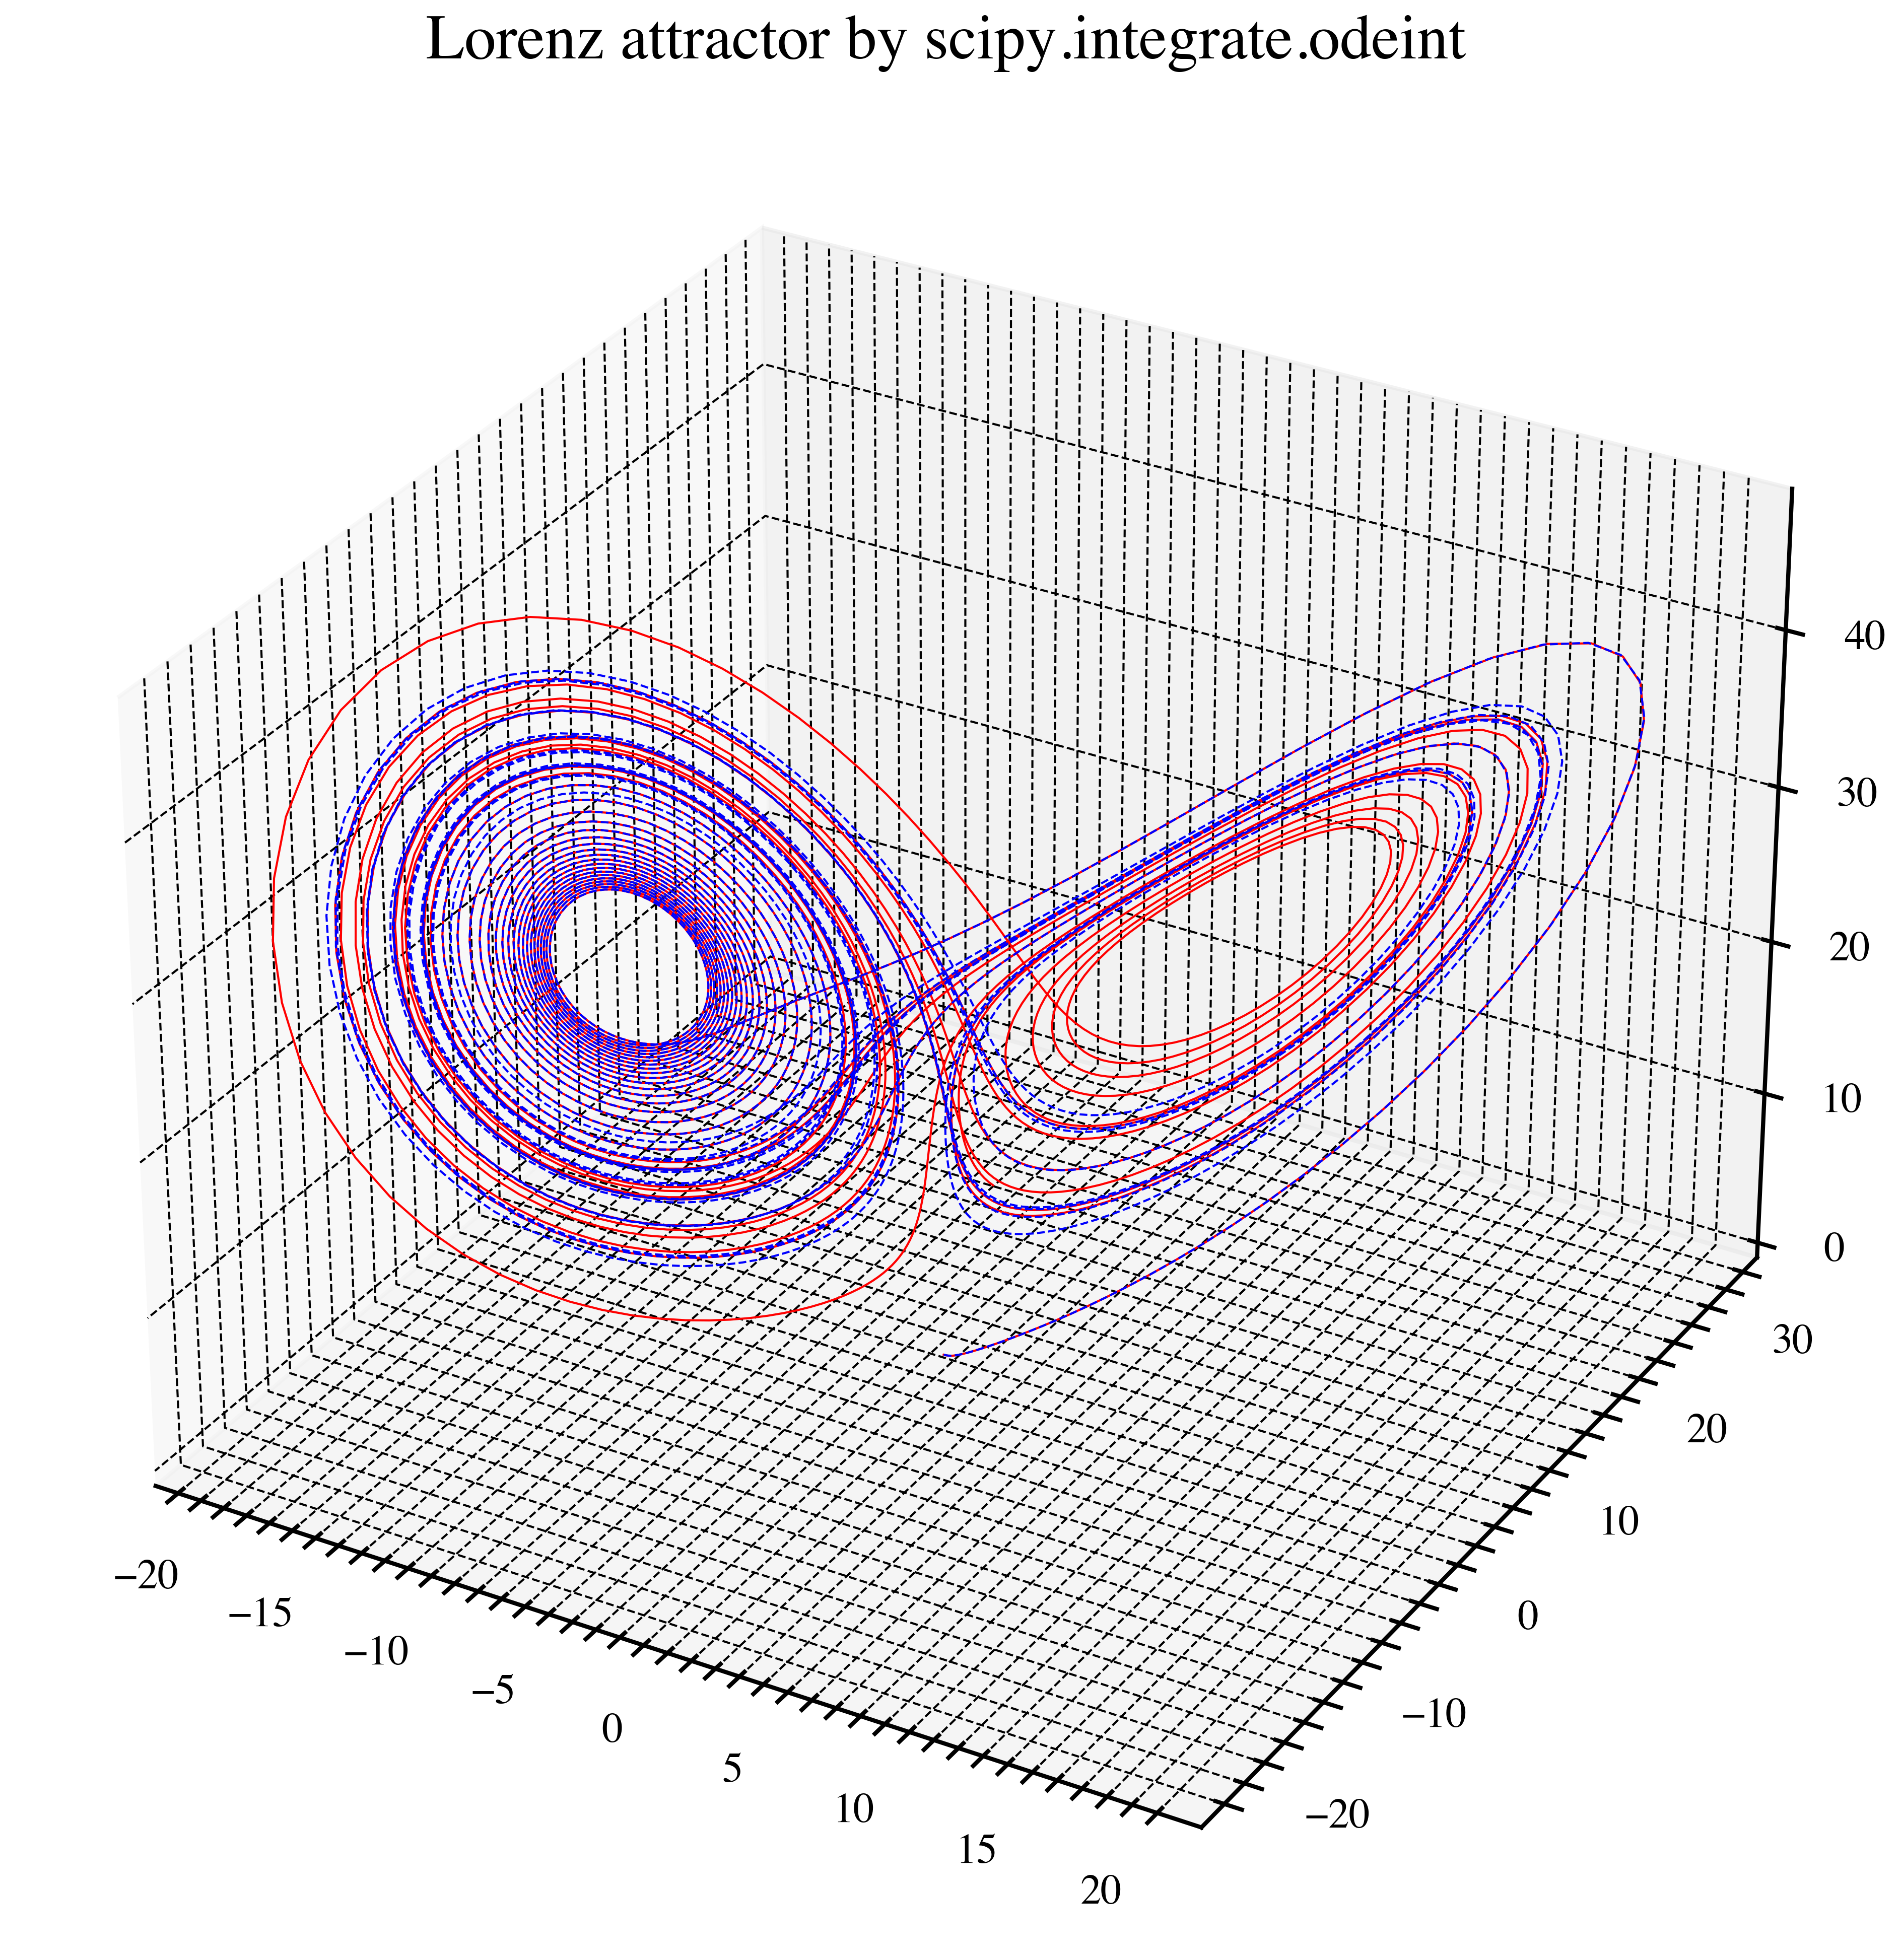

In [100]:
from mpl_toolkits.mplot3d import Axes3D

def lorenz(W, t, sigma, rho, beta):
    x, y, z = W
    dx_dt = sigma*(y-x)
    dy_dt = x*(rho-z) - y
    dz_dt = x*y - beta*z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0, 30, 0.01)
paras = (10., 28., 3.)

W1 = (0., 1., 0.)
track1 = odeint(lorenz, W1, t, args=paras)
W2 = (0., 1.01, 0.)
track2 = odeint(lorenz, W2, t, args=paras)

ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.plot(track1[:,0], track1[:,1], track1[:,2], color='red', lw=0.5)
ax.plot(track2[:,0], track2[:,1], track2[:,2], color='blue', lw=0.5)
ax.tick_params(axis='both', labelsize=10)
ax.set_title("Lorenz attractor by scipy.integrate.odeint", fontsize=15)
plt.show()

## 2. 模拟 SIR

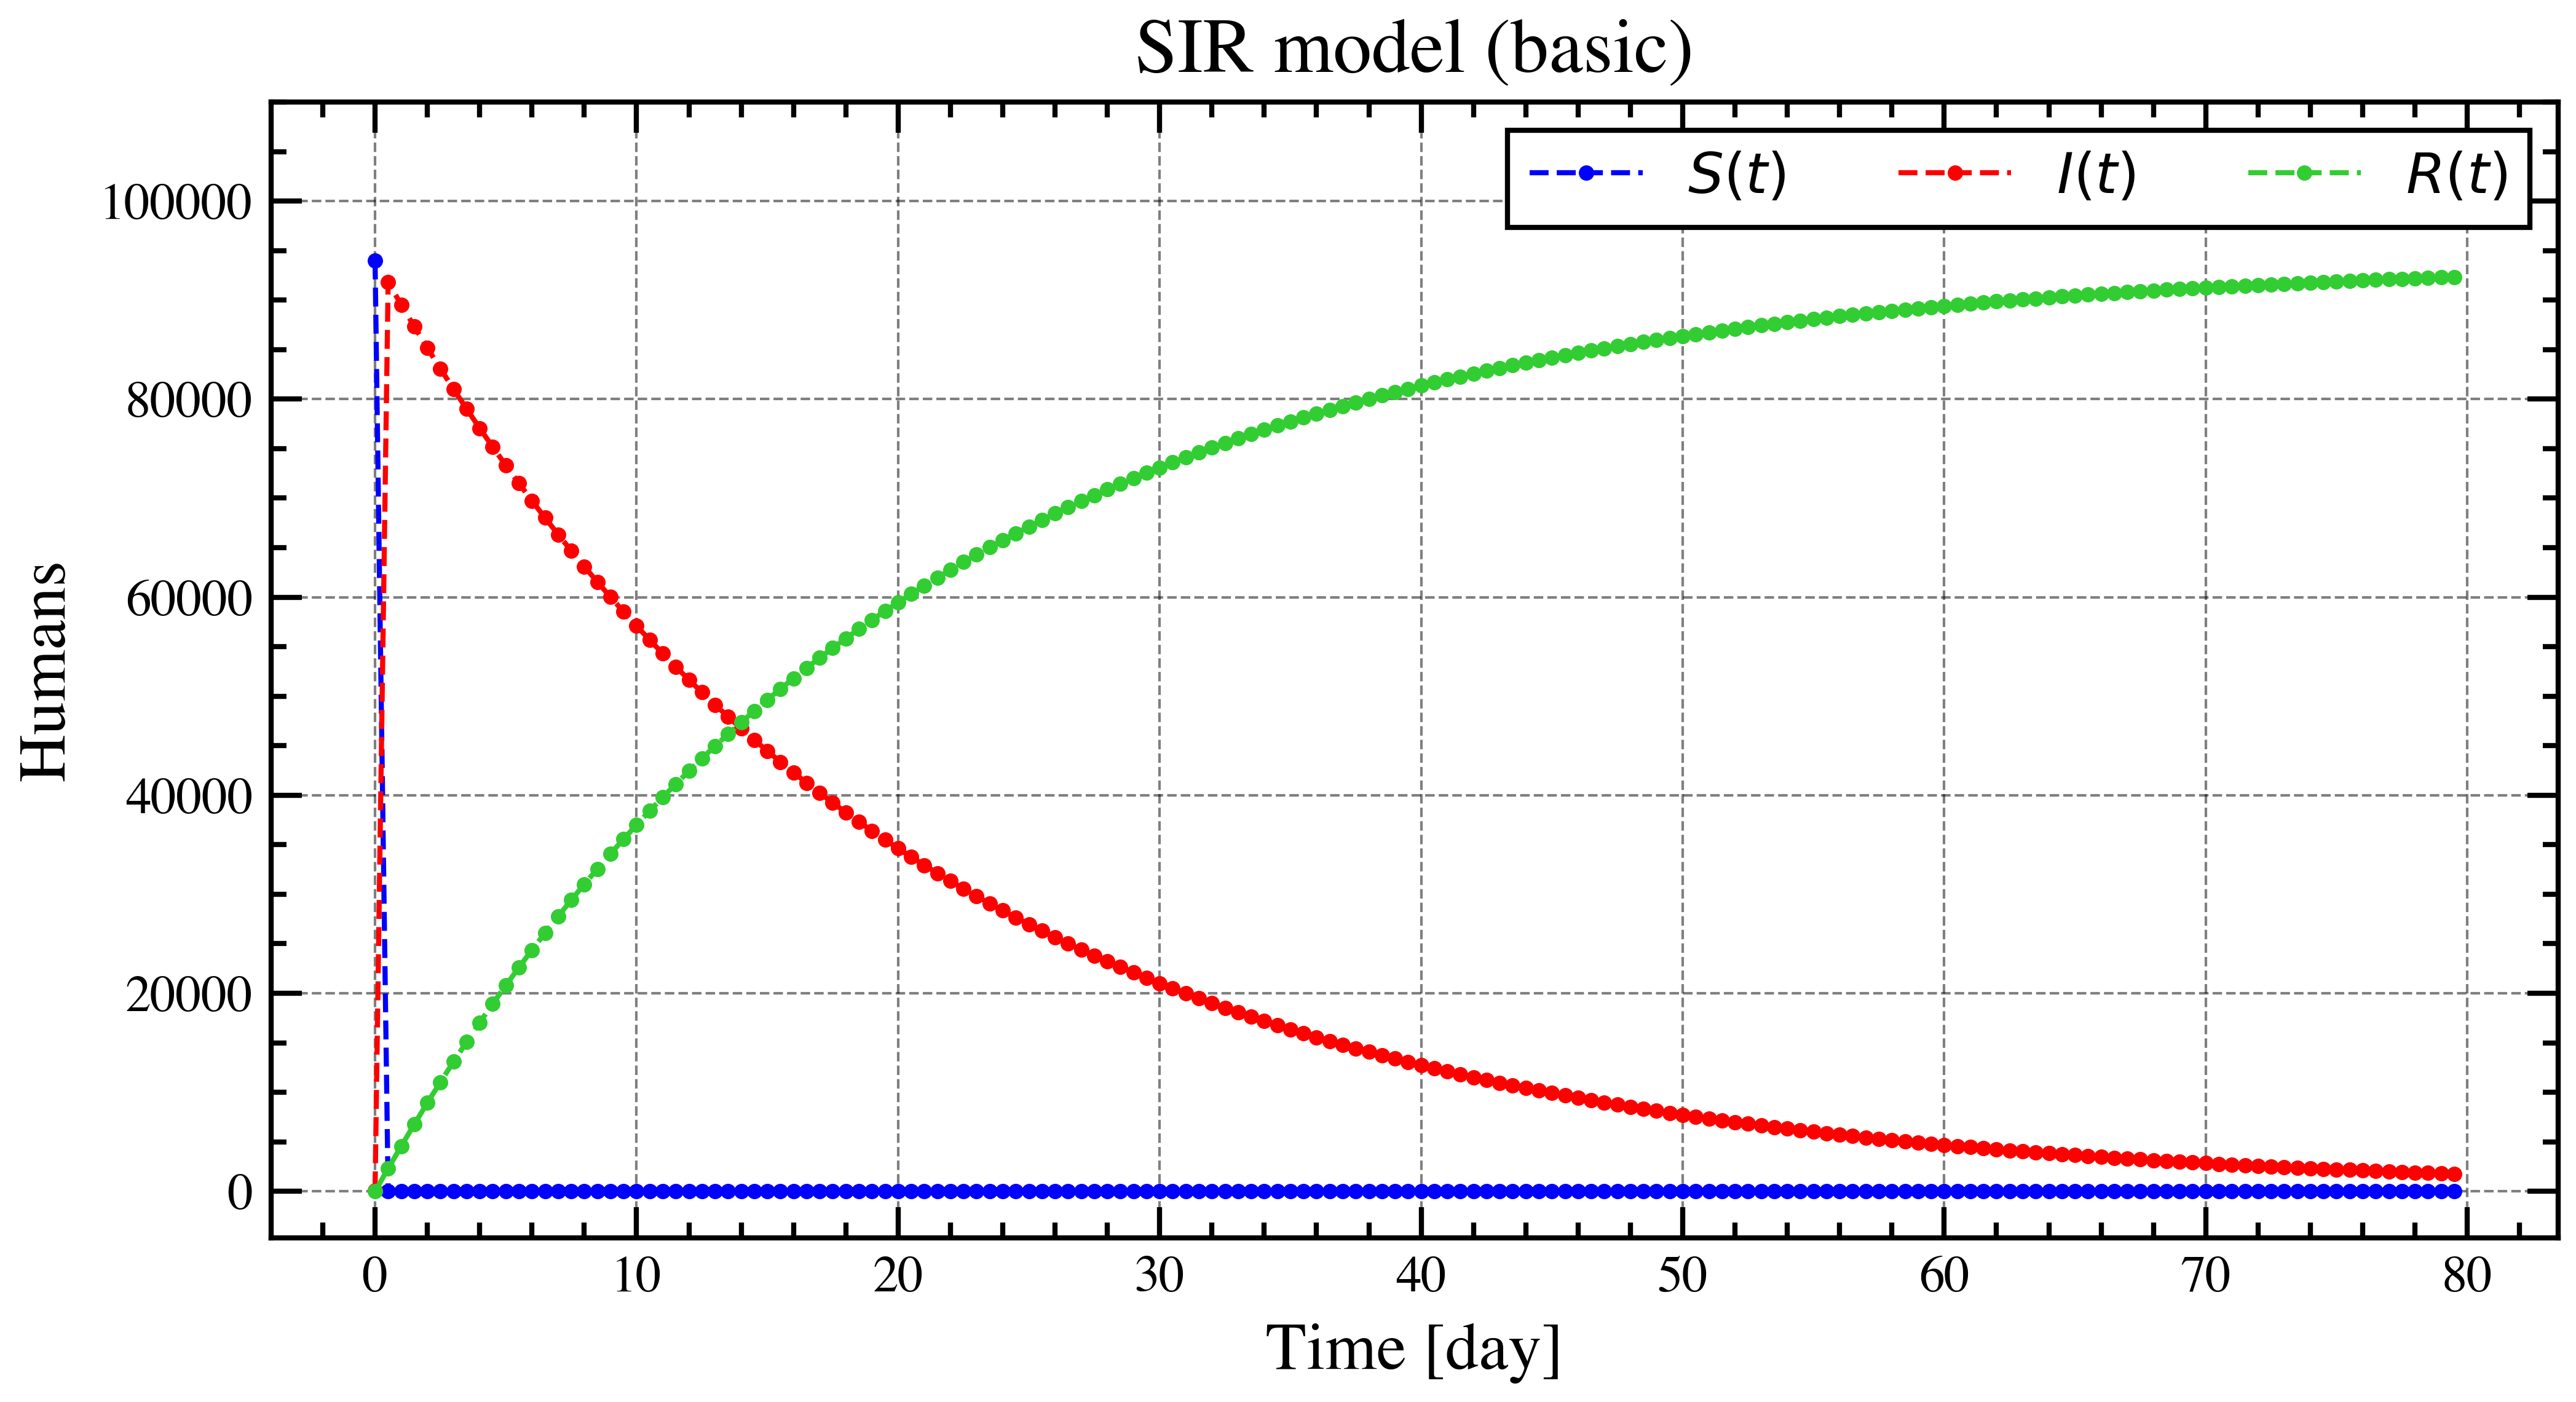

In [232]:
def SIR_basic(sir, t, beta, a):
    S, I, R = sir
    dS_dt = -a*S*I
    dI_dt = -beta*I + a*I*S
    dR_dt = beta*I
    return np.array([dS_dt, dI_dt, dR_dt])

t = np.arange(0, 80, 0.5)
paras = (1/20, 0.0115)
sir0 = (94000., 100., 0.)
track = odeint(SIR_basic, sir0, t, args=paras)

text_str = '\n'.join((r'$m=%.4f$' % paras[0], r'$a=%.4f$' % paras[1]))
plt.figure(figsize=(8, 4))
plt.plot(t, track[:,0], 'o--', lw=1, ms=2, color='blue', label='$S(t)$')
plt.plot(t, track[:,1], 'o--', lw=1, ms=2, color='red', label='$I(t)$')
plt.plot(t, track[:,2], 'o--', lw=1, ms=2, color='limegreen', label='$R(t)$')
plt.tick_params(axis='both', labelsize=10)
plt.ylim(top=110000)
plt.xlabel('Time [day]', fontsize=13)
plt.ylabel('Humans', fontsize=13)
plt.legend(loc='upper right', fontsize=11, ncol=3, fancybox=False, edgecolor='black')
plt.title('SIR model (basic)', fontsize=15)
#plt.text(8, 1090, text_str, bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center', fontsize=10)
plt.savefig('SIR.jpg', dpi=200)
#plt.show()


S(Susceptive)、I(Infected)、R(Recovered)

## 3. SEIR 模型

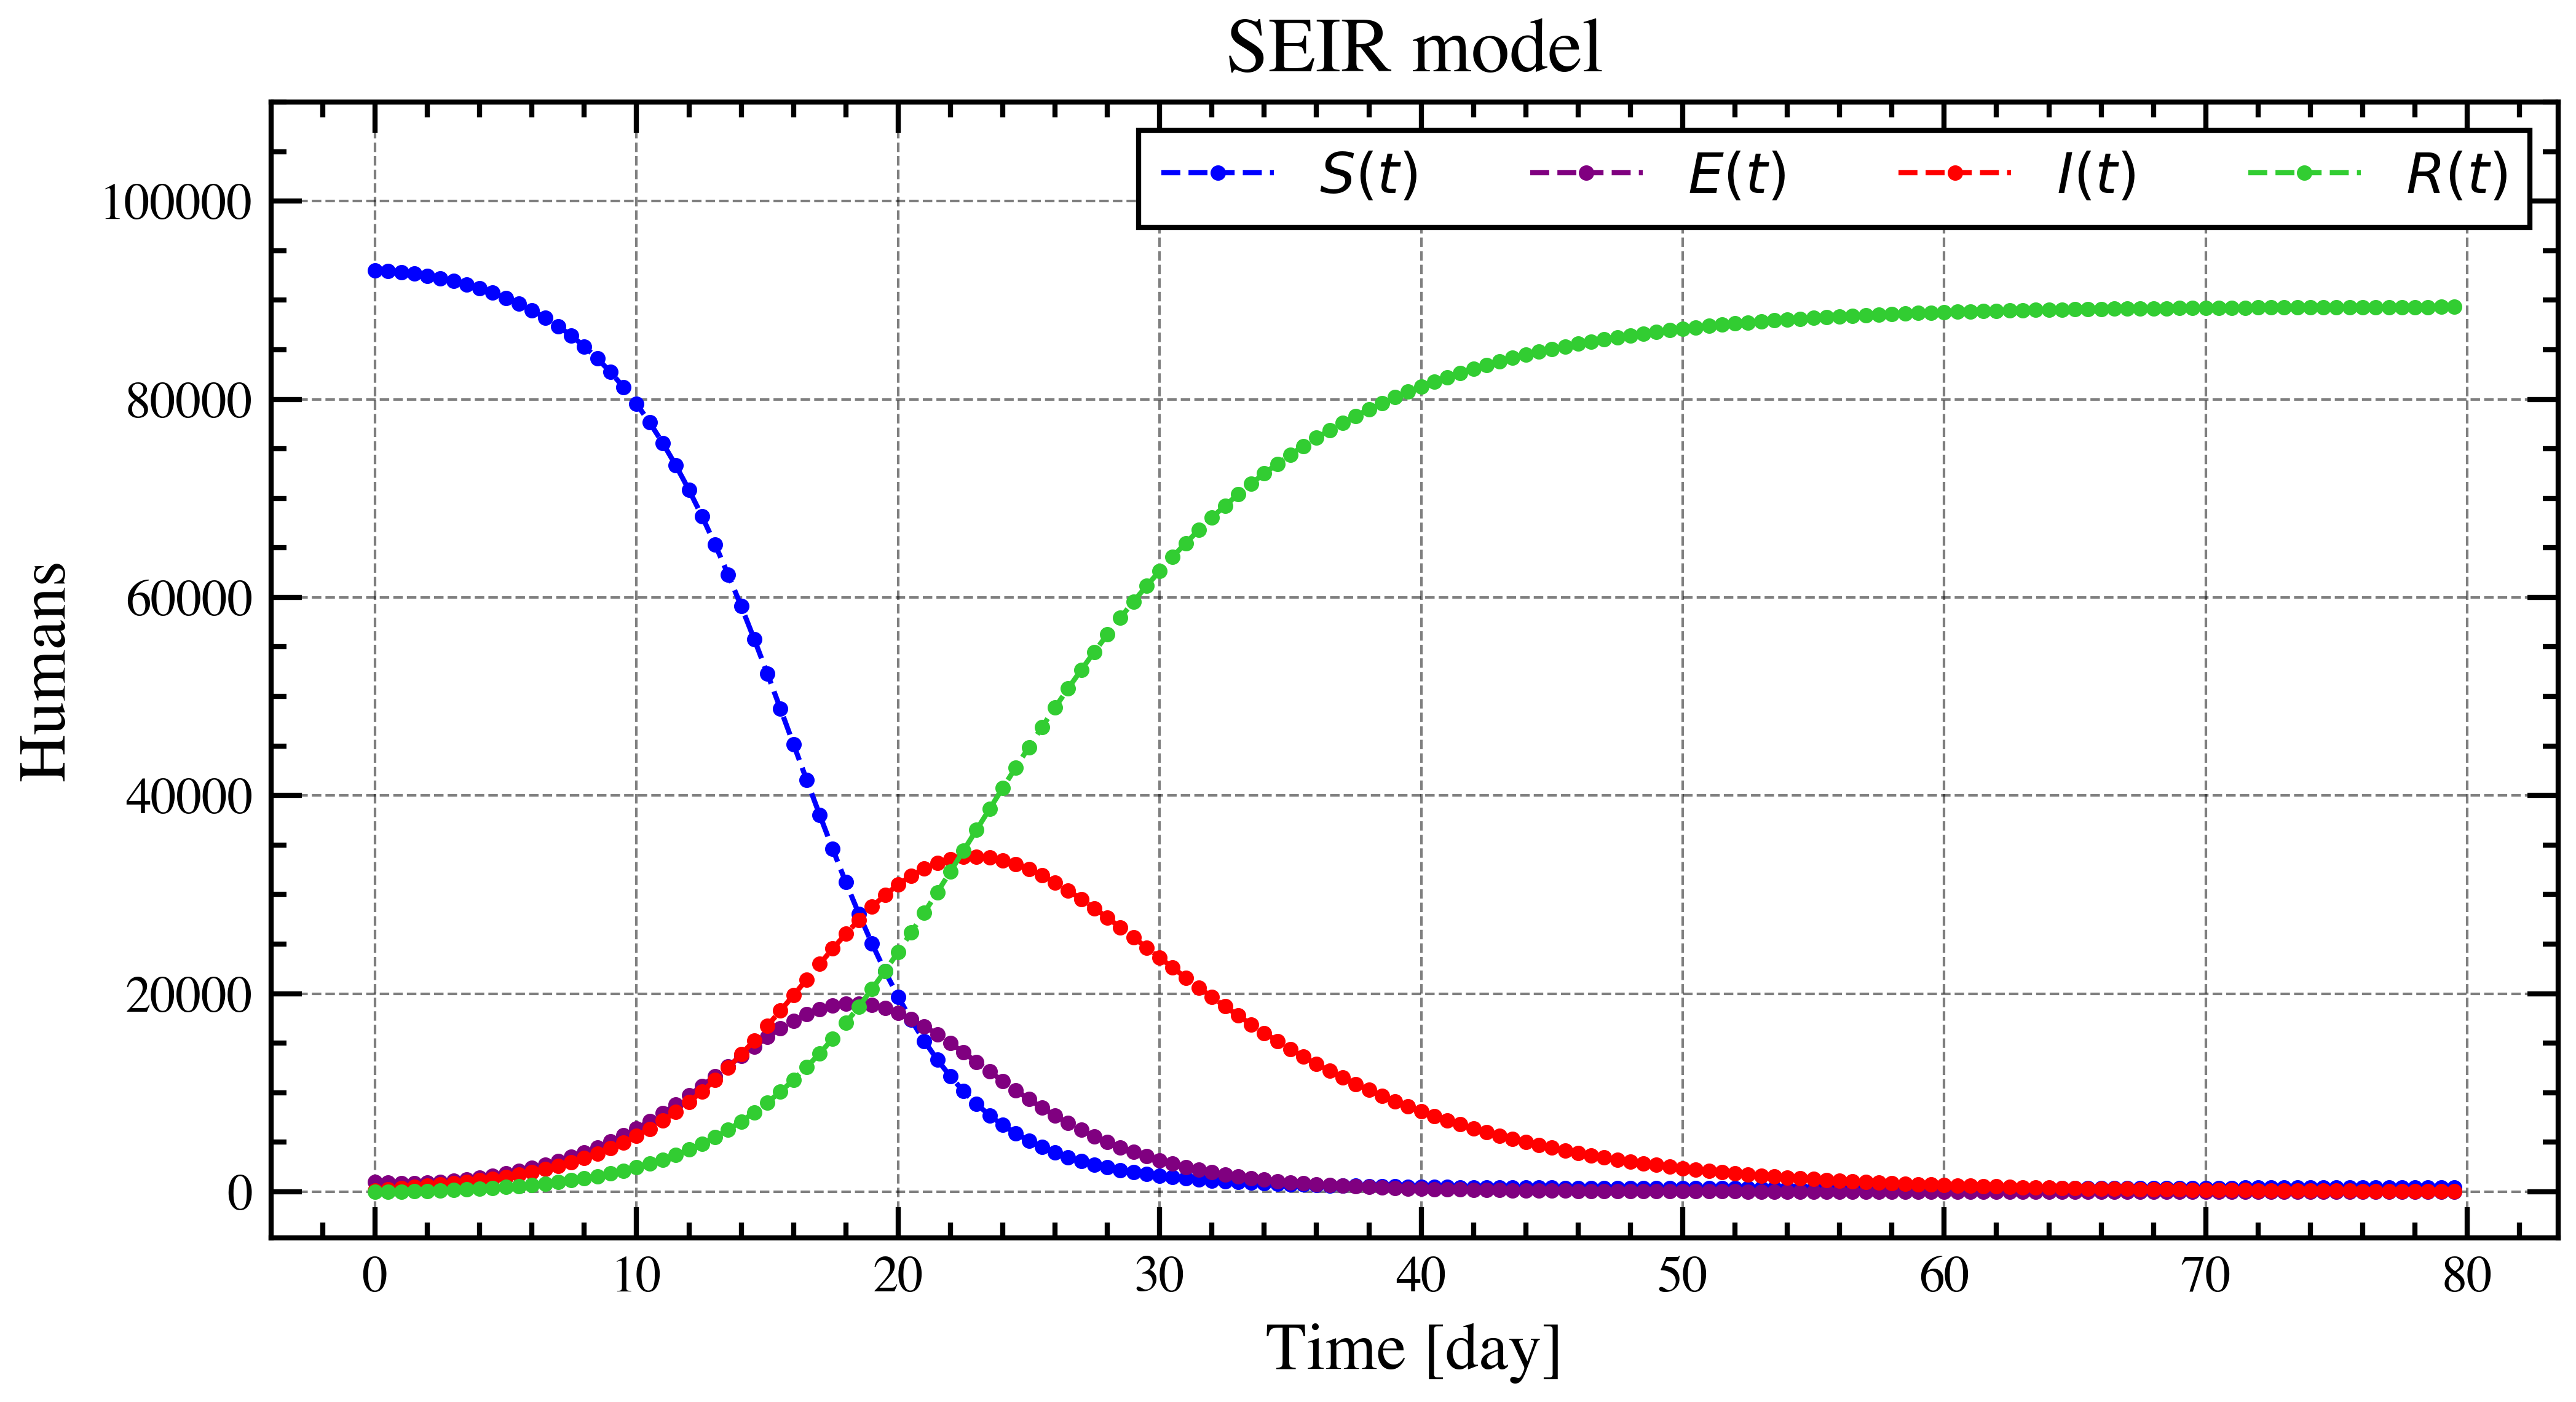

In [237]:
def SEIR(seir, t, mu, alpha, beta, epsilon, gamma):
    S, E, I, R = seir
    N = S + E + I + R
    A = mu*N
    dS_dt = A - mu*S - beta*S*I/N
    dE_dt = beta*S*I/N - (mu+epsilon)*E
    dI_dt = epsilon*E - (gamma+mu+alpha)*I
    dR_dt = gamma*I - mu*R
    #print(beta*epsilon/((epsilon+mu)*(gamma+alpha+mu)))

    return np.array([dS_dt, dE_dt, dI_dt, dR_dt])

t = np.arange(0, 80, 0.5)
paras = (4.563e-5, 0.006, 0.75, 1/3, 1/8)
seir0 = (93000., 1000., 100., 0.)
track = odeint(SEIR, seir0, t, args=paras)


text_str = '\n'.join(('$\mu=4.563*10^{-5}$', r'$\alpha=%.4f$' % paras[1],
                      r'$\beta=%.4f$' % paras[2], r'$\epsilon=%.4f$' % paras[3],
                      r'$\gamma=%.4f$' % paras[4]))
plt.figure(figsize=(8, 4))
plt.plot(t, track[:,0], 'o--', lw=1, ms=2, color='blue', label='$S(t)$')
plt.plot(t, track[:,1], 'o--', lw=1, ms=2, color='purple', label='$E(t)$')
plt.plot(t, track[:,2], 'o--', lw=1, ms=2, color='red', label='$I(t)$')
plt.plot(t, track[:,3], 'o--', lw=1, ms=2, color='limegreen', label='$R(t)$')
plt.tick_params(axis='both', labelsize=10)
plt.xlabel('Time [day]', fontsize=13)
plt.ylabel('Humans', fontsize=13)
plt.ylim(top=1.1e5)
plt.legend(loc='upper right', fontsize=11, ncol=4, fancybox=False, edgecolor='black')
plt.title('SEIR model', fontsize=15)
#plt.text(72, 0.6e7, text_str, bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center', fontsize=10)
plt.savefig('SEIR.jpg', dpi=200)
#plt.show()

## 4. SEIR complicated

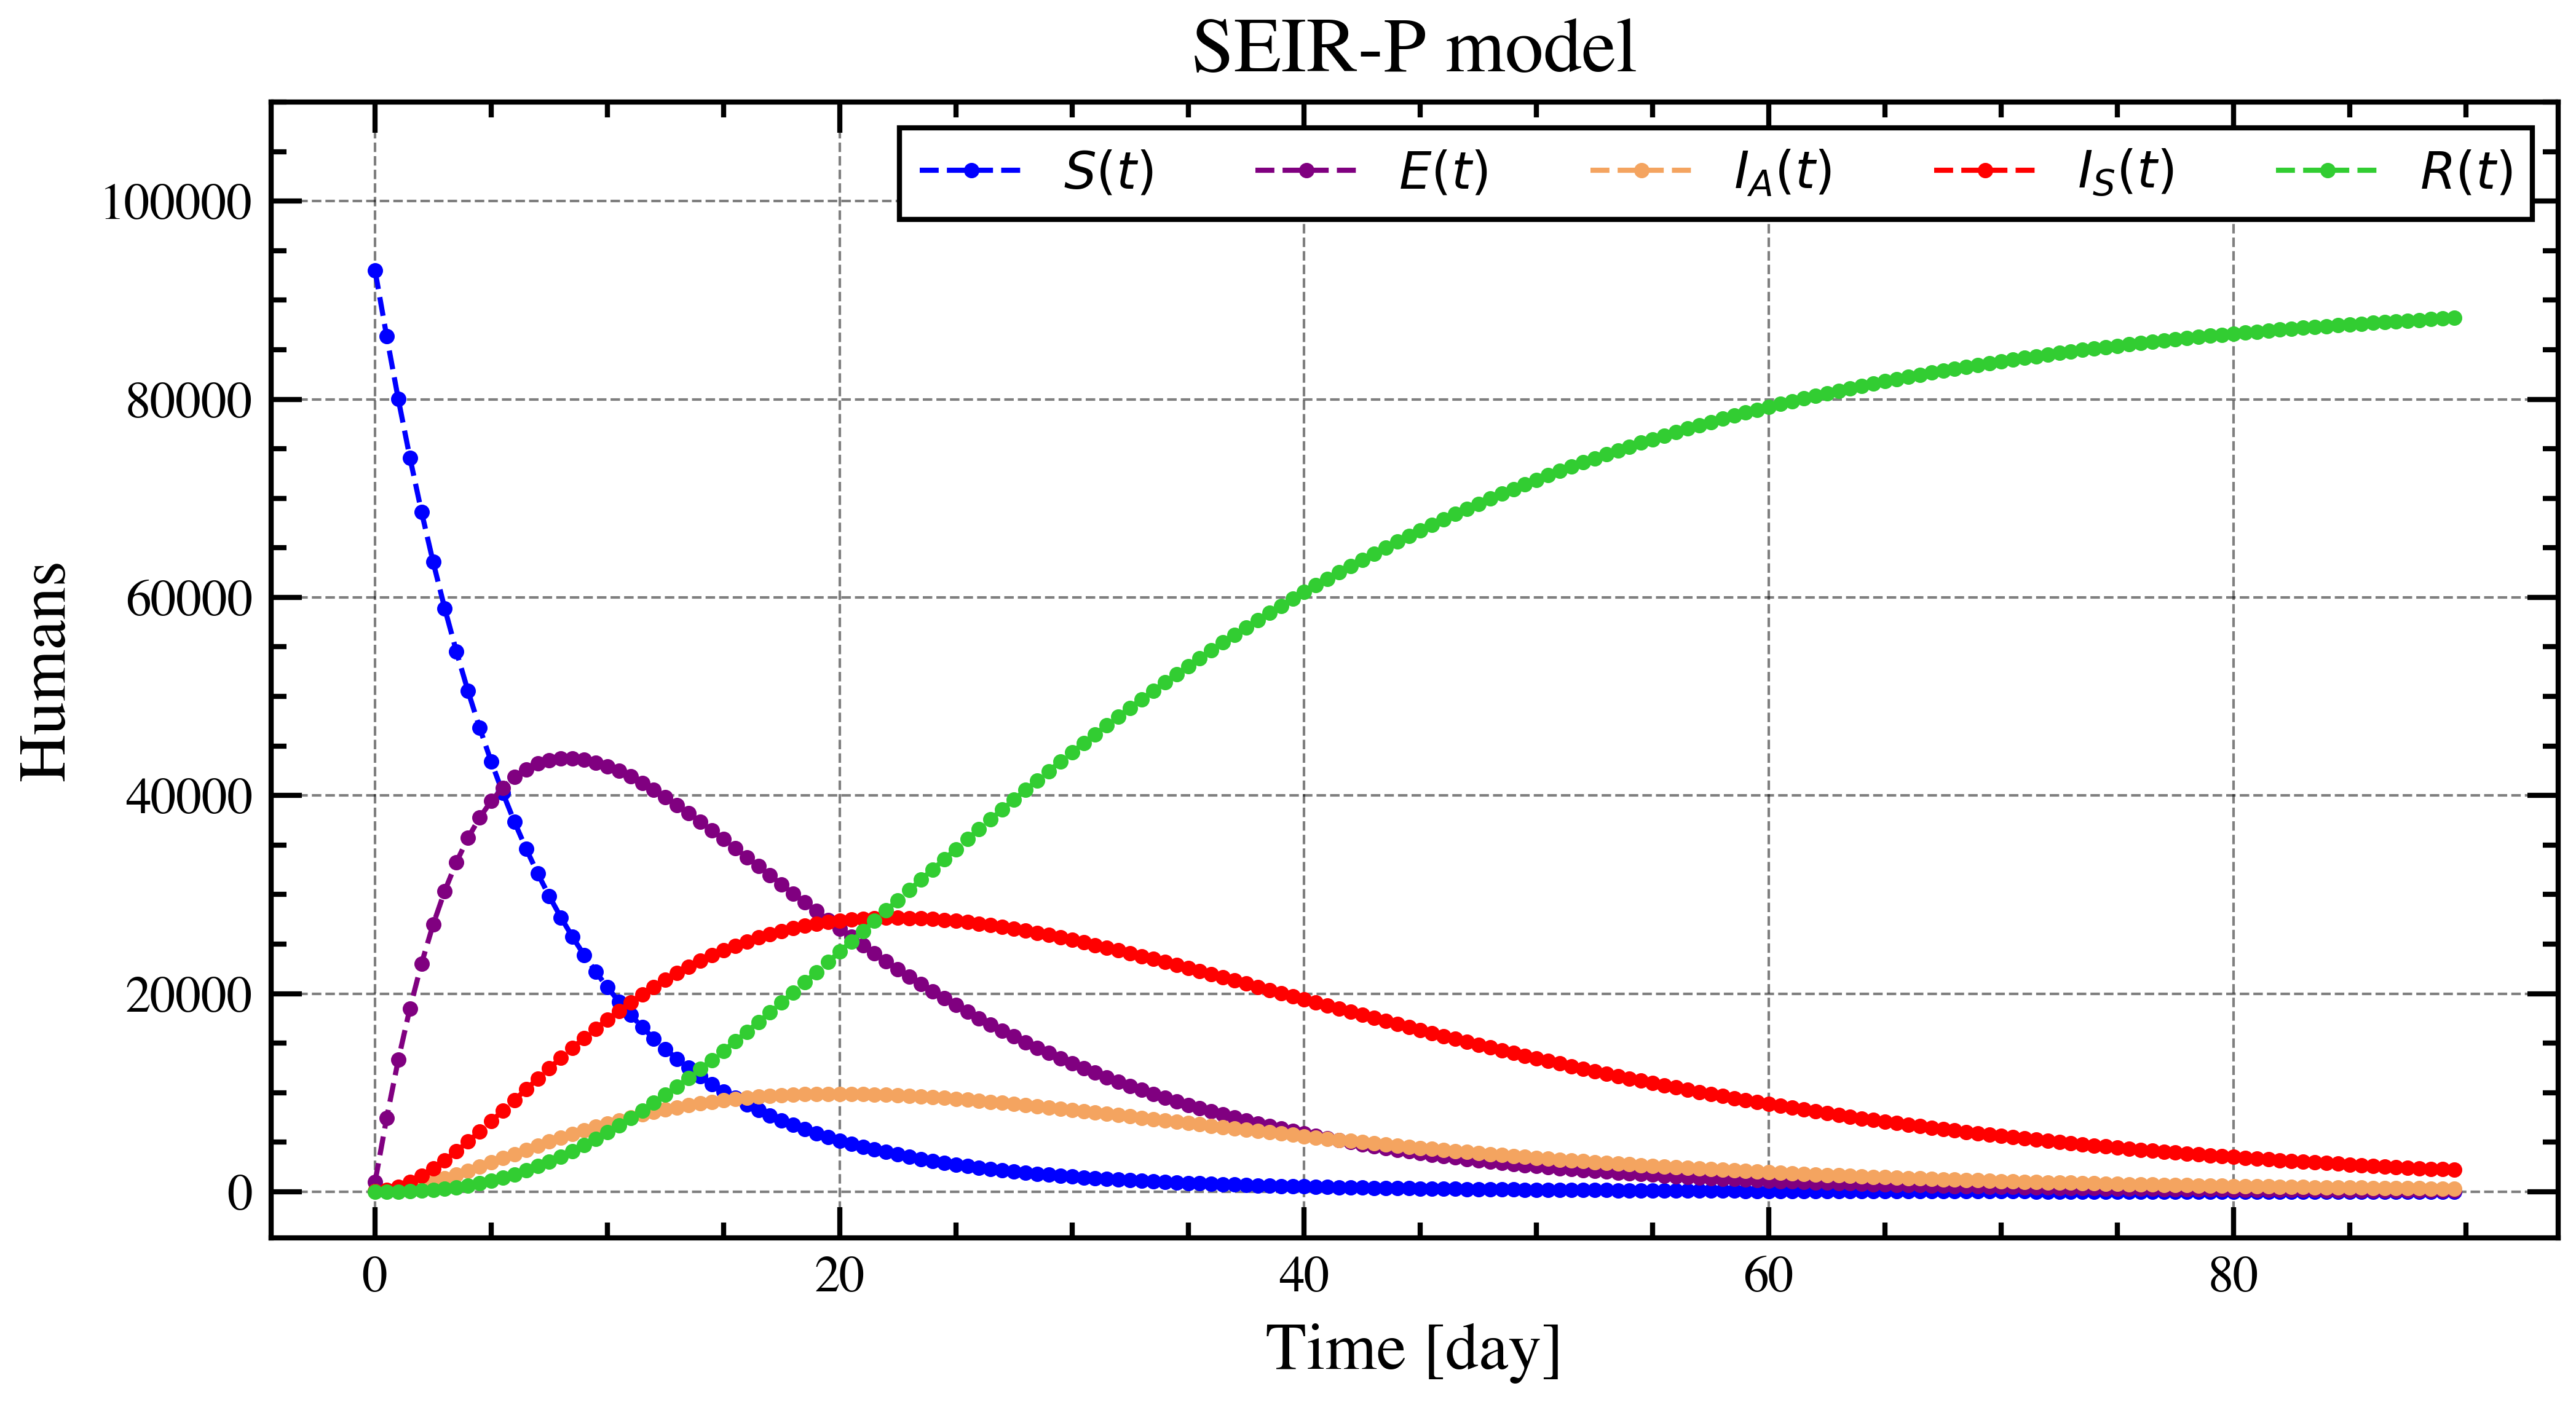

In [251]:
def SEIRP(seirp, t, b, mu, mu_p, alpha, beta, delta, psi, omega, sigma, gamma, eta):
    S, E, I_A, I_S, R, P = seirp
    dS_dt = b - beta[0]*S*P/(1+alpha[0]*P) - beta[1]*S*(I_A+I_S)/(1+alpha[1]*(I_A+I_S)) + psi*E - mu*S
    dE_dt = beta[0]*S*P/(1+alpha[0]*P) + beta[1]*S*(I_A+I_S)/(1+alpha[1]*(I_A+I_S)) - psi*E - mu*E - omega*E
    dI_A_dt= (1-delta)*omega*E - (mu+sigma)*I_A - gamma[1]*I_A
    dI_S_dt= delta*omega*E - (mu+sigma)*I_S - gamma[0]*I_S
    dR_dt = gamma[0]*I_S + gamma[1]*I_A - mu*R
    dP_dt = eta[0]*I_S + eta[1]*I_A - mu_p*P
    return np.array([dS_dt, dE_dt, dI_A_dt, dI_S_dt, dR_dt, dP_dt])

t = np.arange(0, 90, 0.5)
paras = (0.00018, 4.563e-5, 0.1724, (0.1,0.1), (0.00414,0.0115), 0.7, 0.0051, 0.09, 0.0018, (1/20,0.0714), (1/10,1/20))
seirp0 = (93000., 1000., 50., 50., 0., 500.)
track = odeint(SEIRP, seirp0, t, args=paras)

text_str = '\n'.join(('$b=0.00018 days^{-1}$', 
                      '$\mu=4.563*10^{-5} days^{-1}$',
                      r'$\mu_P=%f$' % paras[2],
                      r'$\alpha_1=%f$' % paras[3][0], 
                      r'$\alpha_2=%f$' % paras[3][1], 
                      r'$\beta_1=%f$' % paras[4][0],
                      r'$\beta_2=%f$' % paras[4][1],
                      r'$\delta=%f$' % paras[5],
                      r'$\psi=%f$' % paras[6],
                      r'$\omega=%f$' % paras[7],
                      r'$\sigma=%f$' % paras[8],
                      r'$\gamma_S=%f$' % paras[9][0], 
                      r'$\gamma_A=%f$' % paras[9][1],
                      r'$\eta_S=%f$' % paras[10][0], 
                      r'$\eta_A=%f$' % paras[10][1]))
plt.figure(figsize=(8, 4))
plt.plot(t, track[:,0], 'o--', lw=1, ms=2, color='blue', label='$S(t)$')
plt.plot(t, track[:,1], 'o--', lw=1, ms=2, color='purple', label='$E(t)$')
plt.plot(t, track[:,2], 'o--', lw=1, ms=2, color='sandybrown', label='$I_A(t)$')
plt.plot(t, track[:,3], 'o--', lw=1, ms=2, color='red', label='$I_S(t)$')
plt.plot(t, track[:,4], 'o--', lw=1, ms=2, color='limegreen', label='$R(t)$')
#plt.plot(t, track[:,5], 'o--', lw=1, ms=2, color='black', label='$P(t)$')

plt.tick_params(axis='both', labelsize=10)
plt.xlabel('Time [day]', fontsize=13)
plt.ylabel('Humans', fontsize=13)
plt.ylim(top=1.1e5)
plt.legend(loc='upper right', fontsize=10, ncol=5, fancybox=False, edgecolor='black')
plt.title('SEIR-P model', fontsize=15)
#plt.text(110, 4e4+2000, text_str, bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center', fontsize=10)
plt.savefig('SEIR-P.jpg', dpi=200)
plt.show()


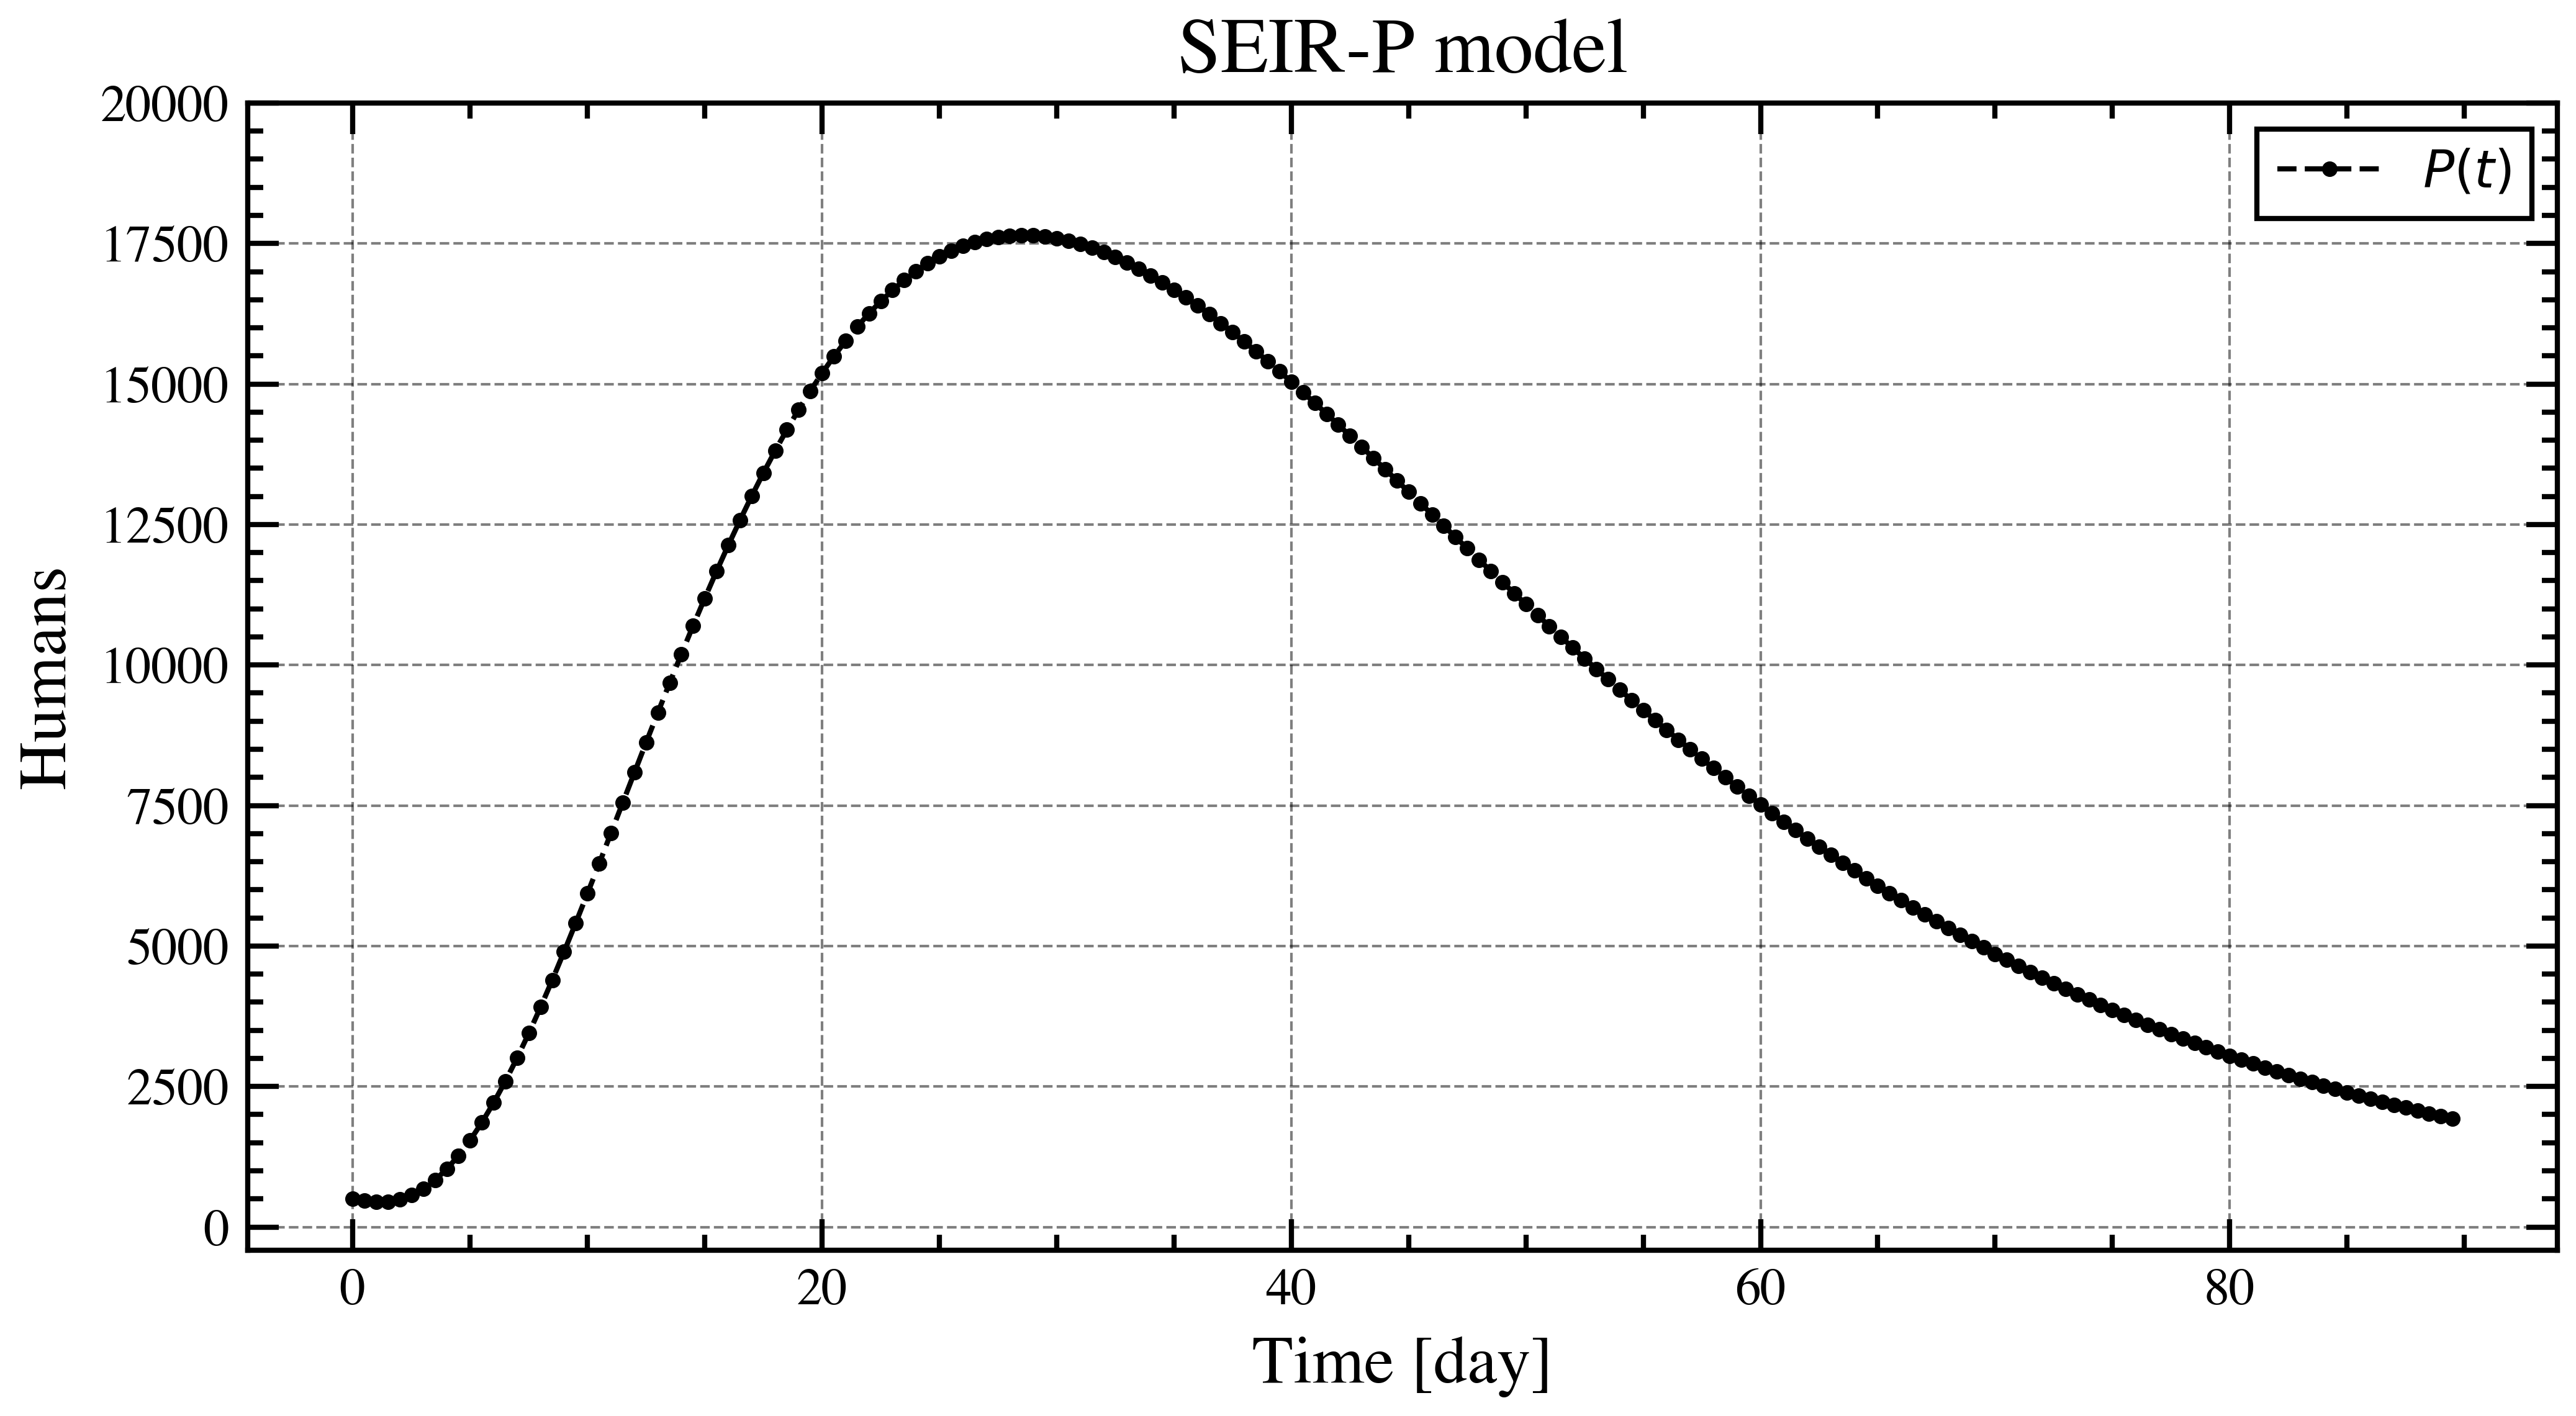

In [252]:
plt.figure(figsize=(8, 4))
plt.plot(t, track[:,5], 'o--', lw=1, ms=2, color='black', label='$P(t)$')

plt.tick_params(axis='both', labelsize=10)
plt.xlabel('Time [day]', fontsize=13)
plt.ylabel('Humans', fontsize=13)
plt.ylim(top=0.2e5)
plt.legend(loc='upper right', fontsize=10, ncol=5, fancybox=False, edgecolor='black')
plt.title('SEIR-P model', fontsize=15)
#plt.text(110, 4e4+2000, text_str, bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center', fontsize=10)
plt.savefig('p.jpg', dpi=200)
plt.show()